In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("root_cause_analysis.csv")

In [3]:
print(df.shape)
print(df.columns)
print(df.head())

(1000, 9)
Index(['ID', 'CPU_LOAD', 'MEMORY_LEAK_LOAD', 'DELAY', 'ERROR_1000',
       'ERROR_1001', 'ERROR_1002', 'ERROR_1003', 'ROOT_CAUSE'],
      dtype='object')
   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [4]:
#checking missing data 
print(df.isnull().sum())

ID                  0
CPU_LOAD            0
MEMORY_LEAK_LOAD    0
DELAY               0
ERROR_1000          0
ERROR_1001          0
ERROR_1002          0
ERROR_1003          0
ROOT_CAUSE          0
dtype: int64


In [5]:
print(df.describe())

                ID     CPU_LOAD  MEMORY_LEAK_LOAD        DELAY   ERROR_1000  \
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000   
mean    500.500000     0.472000          0.418000     0.394000     0.395000   
std     288.819436     0.499465          0.493477     0.488879     0.489095   
min       1.000000     0.000000          0.000000     0.000000     0.000000   
25%     250.750000     0.000000          0.000000     0.000000     0.000000   
50%     500.500000     0.000000          0.000000     0.000000     0.000000   
75%     750.250000     1.000000          1.000000     1.000000     1.000000   
max    1000.000000     1.000000          1.000000     1.000000     1.000000   

        ERROR_1001   ERROR_1002   ERROR_1003  
count  1000.000000  1000.000000  1000.000000  
mean      0.485000     0.432000     0.381000  
std       0.500025     0.495602     0.485876  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%   

In [6]:
# data cleaning 
df = df.dropna()
df = df.apply(pd.to_numeric, errors = 'coerce')

In [7]:
corr = df.corr()
corr['DELAY'].sort_values(ascending=False)

DELAY               1.000000
ERROR_1000          0.344833
ID                 -0.007968
MEMORY_LEAK_LOAD   -0.052662
ERROR_1001         -0.061792
ERROR_1002         -0.100013
ERROR_1003         -0.131118
CPU_LOAD           -0.286832
ROOT_CAUSE               NaN
Name: DELAY, dtype: float64

In [8]:
# error frequency 
error_cols = [c for c in df.columns if 'ERROR_' in c]
df[error_cols].sum().sort_values(ascending=False)

ERROR_1001    485
ERROR_1002    432
ERROR_1000    395
ERROR_1003    381
dtype: int64

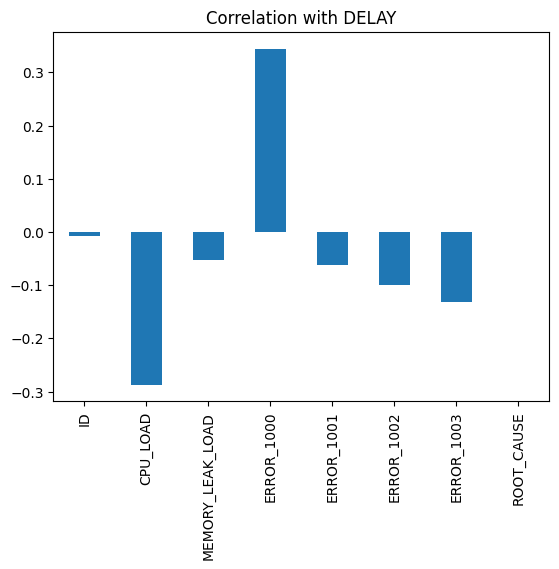

In [9]:
import matplotlib.pyplot as plt

corr_with_delay = df.corr()['DELAY'].drop('DELAY')
corr_with_delay.plot(kind='bar', title='Correlation with DELAY')
plt.show()


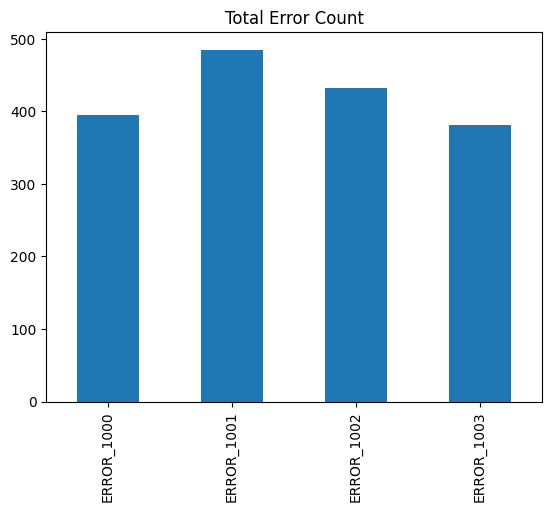

In [10]:
df[error_cols].sum().plot(kind='bar', title='Total Error Count')
plt.show()
